In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
data = pd.read_csv("C:/Users/snehi/Downloads/data.csv", header=None)
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values 

In [ ]:
# Function to plot multiple decision boundaries on a single plot
def plot_decision_boundaries(X, y, history, learning_rate):
    plt.figure(figsize=(10, 6))

    colors = ListedColormap(['#FF9999', '#66B2FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolors='k', s=50)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_values = np.array([x1_min, x1_max])

    initial_weights, initial_bias = history[0]
    x2_values = (-initial_weights[0] * x1_values - initial_bias) / initial_weights[1]
    plt.plot(x1_values, x2_values, linestyle='-', color='red', linewidth=2, 
             label='Initial boundary')

    num_iterations = len(history)

    plot_indices = []
    if num_iterations <= 10:
        plot_indices = list(range(1, num_iterations))
    else:
        step = max(1, (num_iterations - 2) // 10)
        plot_indices = list(range(1, num_iterations - 1, step))
    
    for i in plot_indices:
        weights, bias = history[i]
        x2_values = (-weights[0] * x1_values - bias) / weights[1]
        plt.plot(x1_values, x2_values, linestyle='--', color='green', alpha=0.3)

    final_weights, final_bias = history[-1]
    x2_values = (-final_weights[0] * x1_values - final_bias) / final_weights[1]
    plt.plot(x1_values, x2_values, linestyle='-', color='black', linewidth=2,
             label='Final boundary')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Decision Boundaries (lr={learning_rate})')
    plt.legend()
    plt.grid(True)
    plt.xlim(x1_min, x1_max)

    y_margin = 1
    plt.ylim(X[:, 1].min() - y_margin, X[:, 1].max() + y_margin)
    
    plt.show()

In [ ]:
# Perceptron implementation
def perceptron(X, y, learning_rate=0.1, max_iterations=65, plot_steps=False):
    n_features = X.shape[1]
    np.random.seed(42)  
    weights = np.random.randn(n_features)
    bias = np.random.randn()

    history = [(np.copy(weights), bias)]

    iteration = 0
    for _ in range(max_iterations):
        iteration += 1
        misclassified = 0

        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            prediction = 1 if z >= 0 else 0

            if prediction != y[i]:
                misclassified += 1
                
                if prediction == 0:  # Actual is 1, prediction is 0
                    bias += learning_rate
                    weights += learning_rate * X[i]
                else:  # Actual is 0, prediction is 1
                    bias -= learning_rate
                    weights -= learning_rate * X[i]
                
                history.append((np.copy(weights), bias))
        
        if misclassified == 0:
            print(f"Converged after {iteration} iterations")
            break
    
    return weights, bias, history, iteration


Training with learning rate: 0.01
Learning rate: 0.01
Iterations to converge: 65
Final weights: [-0.18100855 -0.263552  ]
Final bias: 0.2176885381006921
Accuracy: 93.00%


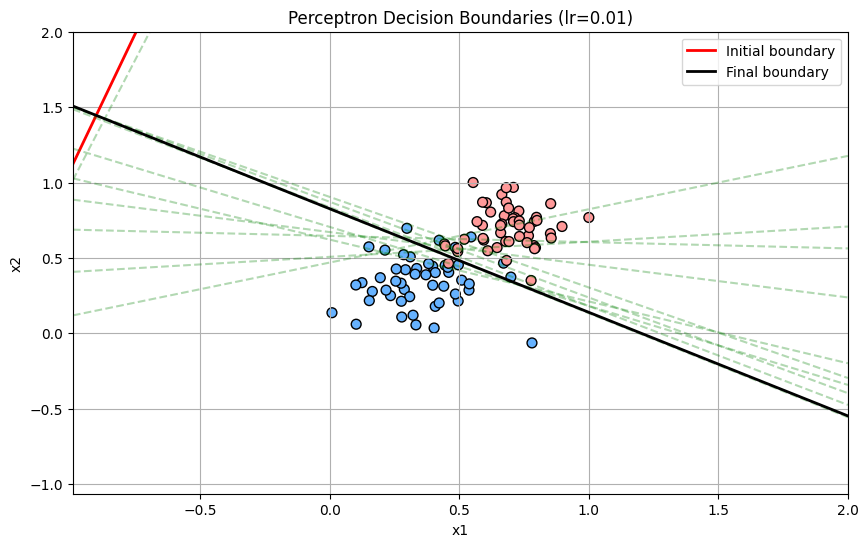


Training with learning rate: 0.1
Learning rate: 0.1
Iterations to converge: 65
Final weights: [-0.53425085 -0.8637153 ]
Final bias: 0.5476885381006925
Accuracy: 80.00%


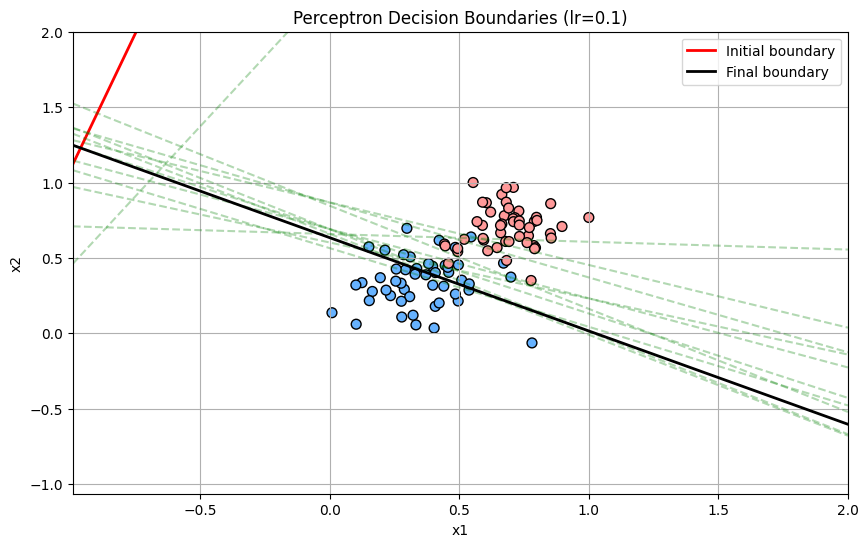


Training with learning rate: 1.0
Learning rate: 1.0
Iterations to converge: 65
Final weights: [-4.42335585 -8.1133413 ]
Final bias: 5.6476885381006925
Accuracy: 93.00%


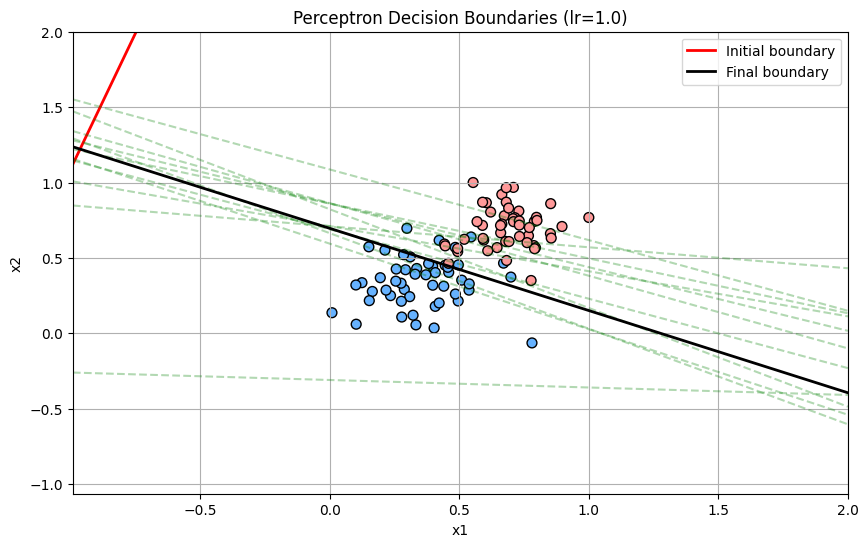

In [15]:
# Experiment with different learning rates and show evolution of boundaries
def experiment_with_boundary_evolution(X, y, learning_rates=[0.01, 0.1, 1], max_iterations=65):
    results = {}

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        weights, bias, history, iterations = perceptron(X, y, learning_rate=lr, 
                                                       max_iterations=max_iterations)
        
        correct = 0
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            prediction = 1 if z >= 0 else 0
            if prediction == y[i]:
                correct += 1
        
        accuracy = correct / len(X) * 100
        
        results[lr] = {
            'weights': weights,
            'bias': bias,
            'iterations': iterations,
            'accuracy': accuracy,
            'history': history
        }
        
        print(f"Learning rate: {lr}")
        print(f"Iterations to converge: {iterations}")
        print(f"Final weights: {weights}")
        print(f"Final bias: {bias}")
        print(f"Accuracy: {accuracy:.2f}%")
        
        plot_decision_boundaries(X, y, history, lr)
    
    return results

results = experiment_with_boundary_evolution(X, y, learning_rates=[0.01, 0.1, 1.0])

plt.show()

# Part-2

In [16]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# Function to plot multiple decision boundaries on a single plot
def plot_decision_boundaries(X, y, history, learning_rate, epoch_interval=5):
    plt.figure(figsize=(10, 6))
    
    colors = ListedColormap(['#FF9999', '#66B2FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolors='k', s=50)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_values = np.array([x1_min, x1_max])
    
    initial_weights, initial_bias = history[0]
    x2_values = (-initial_weights[0] * x1_values - initial_bias) / initial_weights[1]
    plt.plot(x1_values, x2_values, linestyle='-', color='red', linewidth=2, 
             label='Initial boundary')
    
    num_epochs = len(history)
    
    for i in range(1, num_epochs-1):
        weights, bias = history[i]
        x2_values = (-weights[0] * x1_values - bias) / weights[1]
        plt.plot(x1_values, x2_values, linestyle='--', color='green', alpha=0.3)
    
    final_weights, final_bias = history[-1]
    x2_values = (-final_weights[0] * x1_values - final_bias) / final_weights[1]
    plt.plot(x1_values, x2_values, linestyle='-', color='black', linewidth=2,
             label='Final boundary')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Decision Boundaries - Gradient Descent (lr={learning_rate})')
    plt.legend()
    plt.grid(True)
    plt.xlim(x1_min, x1_max)
    
    y_margin = 1
    plt.ylim(X[:, 1].min() - y_margin, X[:, 1].max() + y_margin)
    
    plt.show()

In [18]:
# Function to plot the error (log loss) over epochs
def plot_error_graph(errors, learning_rate, epoch_interval=5):
    plt.figure(figsize=(10, 6))
    epochs = np.arange(0, len(errors) * epoch_interval, epoch_interval)  
    
    plt.plot(epochs, errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'Log Loss vs. Epochs (lr={learning_rate})')
    plt.grid(True)
    plt.show()

In [ ]:
# Perceptron implementation using Gradient Descent
def perceptron_gradient_descent(X, y, learning_rate=0.1, epochs=100, plot_interval=10):

    n_features = X.shape[1]
    np.random.seed(42)  
    weights = np.random.randn(n_features)
    bias = np.random.randn()
    
    history = [(np.copy(weights), bias)]
    errors = []
    
    for epoch in range(epochs):       
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        if epoch % plot_interval == 0:
            current_loss = log_loss(y, y_pred)
            errors.append(current_loss)
            print(f"Epoch {epoch}, Log Loss: {current_loss:.6f}")
        
        # Backward pass - update weights and bias
        error = y - y_pred  
        
        # Update bias: b + r(y - ŷ) → b
        bias += learning_rate * np.sum(error)
        
        # Update weights: wi + r(y - ŷ)xi → wi
        for i in range(n_features):
            weights[i] += learning_rate * np.sum(error * X[:, i])
        
        if epoch % plot_interval == 0:
            history.append((np.copy(weights), bias))
    
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    final_loss = log_loss(y, y_pred)
    print(f"Final Log Loss: {final_loss:.6f}")
    
    last_weights, last_bias = history[-1]
    if not np.array_equal(weights, last_weights) or bias != last_bias:
        history.append((np.copy(weights), bias))
    
    return weights, bias, history, errors

Perceptron with Gradient Descent

Training with learning rate: 0.01
Epoch 0, Log Loss: 0.807333
Epoch 10, Log Loss: 0.588202
Epoch 20, Log Loss: 0.527992
Epoch 30, Log Loss: 0.480655
Epoch 40, Log Loss: 0.442831
Epoch 50, Log Loss: 0.412104
Epoch 60, Log Loss: 0.386743
Epoch 70, Log Loss: 0.365503
Epoch 80, Log Loss: 0.347481
Epoch 90, Log Loss: 0.332010
Final Log Loss: 0.318591
Learning rate: 0.01
Final weights: [-3.02581855 -3.73366866]
Final bias: 3.4151735371848457
Accuracy: 93.00%


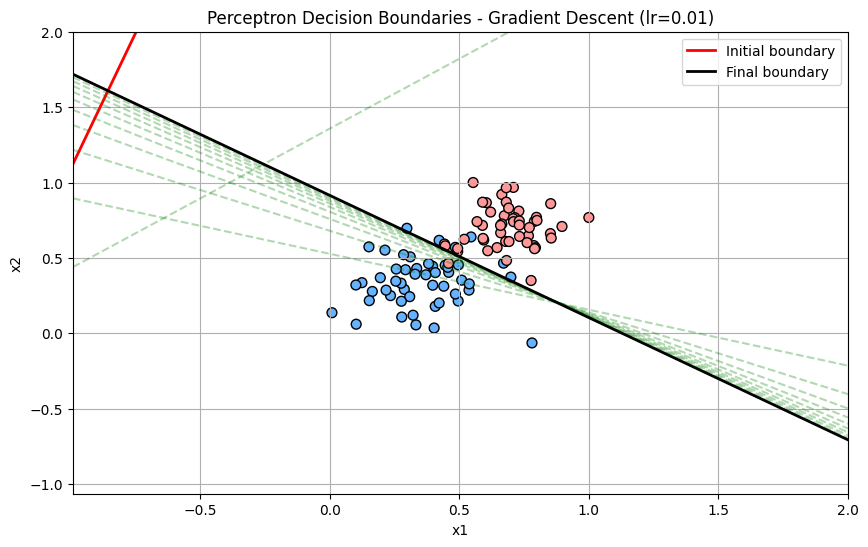

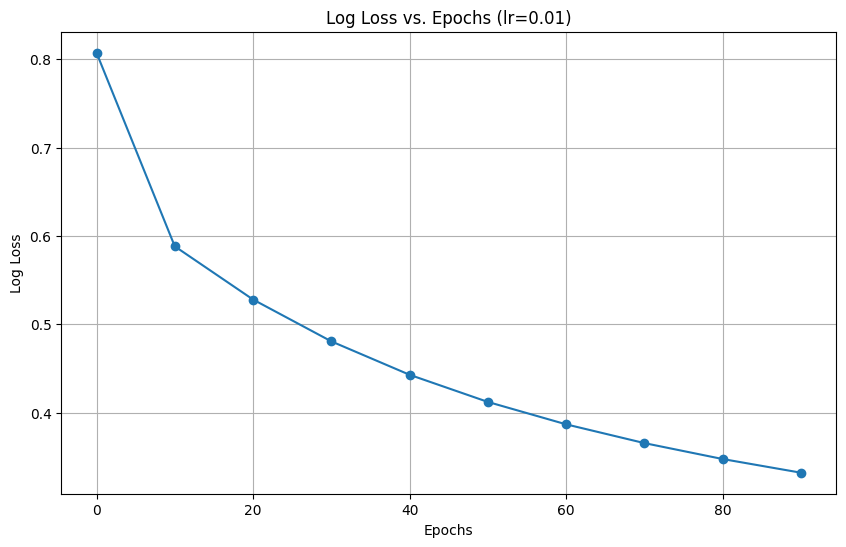


Training with learning rate: 0.1
Epoch 0, Log Loss: 0.807333
Epoch 10, Log Loss: 0.512779
Epoch 20, Log Loss: 0.203829
Epoch 30, Log Loss: 0.186354
Epoch 40, Log Loss: 0.176658
Epoch 50, Log Loss: 0.169742
Epoch 60, Log Loss: 0.164568
Epoch 70, Log Loss: 0.160559
Epoch 80, Log Loss: 0.157368
Epoch 90, Log Loss: 0.154773
Final Log Loss: 0.152626
Learning rate: 0.1
Final weights: [-9.40680912 -9.92431046]
Final bias: 10.136624599036498
Accuracy: 92.00%


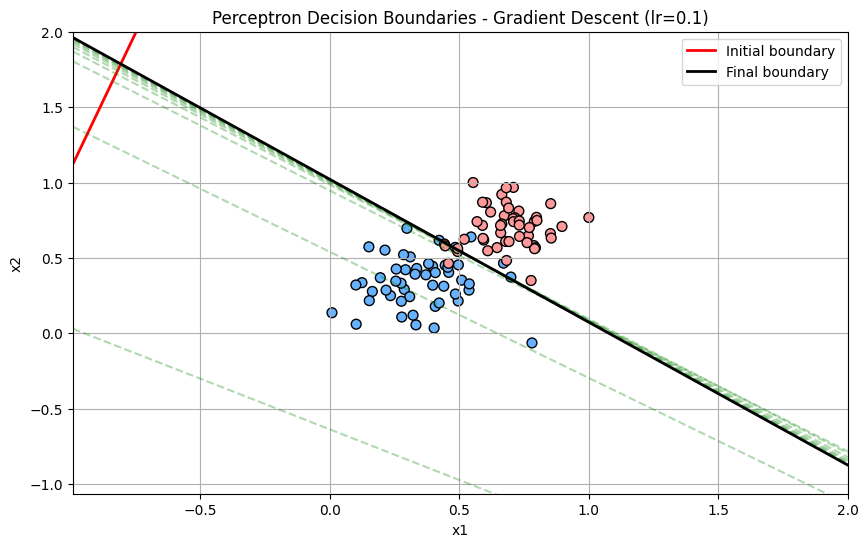

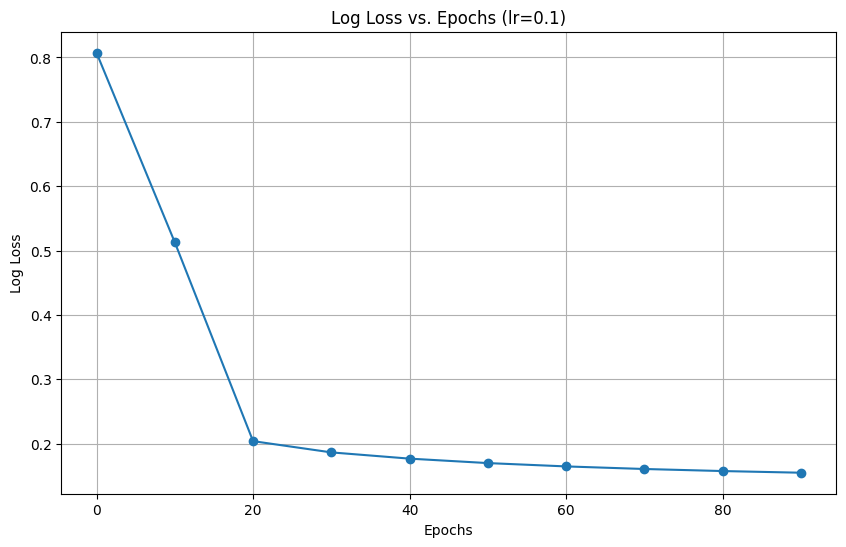


Training with learning rate: 1.0
Epoch 0, Log Loss: 0.807333
Epoch 10, Log Loss: 11.453220
Epoch 20, Log Loss: 1.047947
Epoch 30, Log Loss: 0.330794
Epoch 40, Log Loss: 0.345697
Epoch 50, Log Loss: 0.349333
Epoch 60, Log Loss: 0.349337
Epoch 70, Log Loss: 0.348165
Epoch 80, Log Loss: 0.346541
Epoch 90, Log Loss: 0.344759
Final Log Loss: 0.342971
Learning rate: 1.0
Final weights: [-49.4253871  -54.88688276]
Final bias: 58.76764766022309
Accuracy: 93.00%


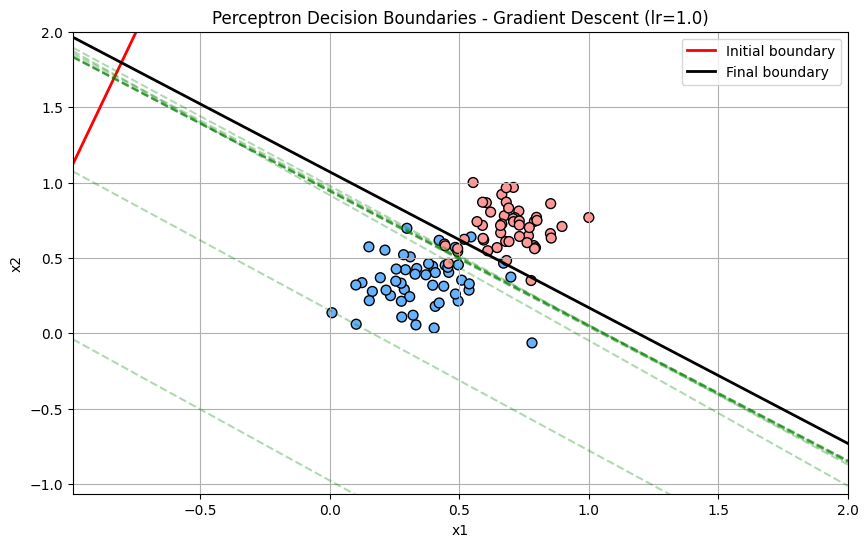

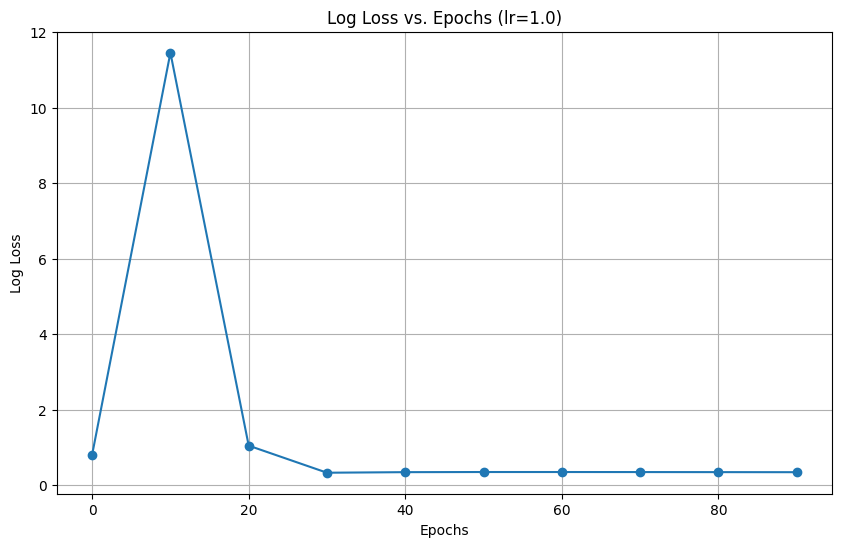

In [20]:
# Function for testing different learning rates
def experiment_learning_rates(X, y, learning_rates=[0.01, 0.1, 1], epochs=100, plot_interval=10):
    results = {}
    
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        weights, bias, history, errors = perceptron_gradient_descent(
            X, y, learning_rate=lr, epochs=epochs, plot_interval=plot_interval
        )
        
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        y_pred_binary = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(y_pred_binary == y) * 100
        
        results[lr] = {
            'weights': weights,
            'bias': bias,
            'accuracy': accuracy,
            'errors': errors,
            'history': history
        }
        
        print(f"Learning rate: {lr}")
        print(f"Final weights: {weights}")
        print(f"Final bias: {bias}")
        print(f"Accuracy: {accuracy:.2f}%")
       
        plot_decision_boundaries(X, y, history, lr, plot_interval)
        
        plot_error_graph(errors, lr, plot_interval)
    
    return results

print("Perceptron with Gradient Descent")
plot_interval = 10
results = experiment_learning_rates(
    X, y, 
    learning_rates=[0.01, 0.1, 1.0], 
    epochs=100, 
    plot_interval=plot_interval
)

plt.show()
